# Employee attrition analysis

- This is a project on Kaggle competition, reference: 
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset


- The project deals with imbalanced data and mix-type variables to predict attrition of employees

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
data=pd.read_csv("/Users/admin/Desktop/python practice/HR_analysis/WA_Fn-UseC_-HR-Employee-Attrition.csv")

## 1. Data exploration

In [13]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [15]:
## Check if data is imbalanced
print("Attriition is yes:{}\nAttrition is no:{}".format(
    (data.Attrition=="Yes").sum(),
(data.Attrition=="No").sum()))

Attriition is yes:237
Attrition is no:1233


In [16]:
##Check missing data
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

## 2. Data preprocessing

##### For Numberical label, use Scatter plot to see the trend
data.ColumnName.describr()
sns.distplot(data["ColumnNmae"])



In [17]:
##Read the column types
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Change Categoric features to Dummy vairables

In [18]:
##Get only obejct columns
data.select_dtypes(include="object").head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [19]:
## Get_dummies from Pandas
data_ca=pd.get_dummies(data.loc[:,data.columns!="Attrition"].select_dtypes(include="object"))

In [20]:
## Change target variable to Numeric variable
target_map={'Yes':1,'No':0}
data['Attrition']=data['Attrition'].apply(lambda x: target_map[x])

### Combine the dummy variable with the non-categoric data

In [21]:
data1=pd.concat([data.select_dtypes(include="int"),data_ca],axis=1)

In [23]:
data1.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


### Calculate correlation

#### Use plot to show the correalation Remember scale data first

In [15]:
##TO BIG CAN'T SEE PROPERLY: sns.pairplot(data1, size=2.5)

In [24]:
##get the correaltion to response variable
data1.corr()['Attrition'][:]

Age                                 -0.159205
Attrition                            1.000000
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EmployeeCount                             NaN
EmployeeNumber                      -0.010577
EnvironmentSatisfaction             -0.103369
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StandardHours                             NaN
StockOptionLevel                    -0.137145
TotalWorkingYears                   -0.171063
TrainingTimesLastYear             

In [25]:
data1.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185,NaN,-0.028062,0.028062
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419,NaN,-0.246118,0.246118
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835,NaN,-0.009135,0.009135
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445,NaN,-0.025514,0.025514
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168,NaN,0.020322,-0.020322
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.013983,-0.017686,0.023263,0.006255,-0.025149,0.053933,-0.035189,NaN,0.024037,-0.024037
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035,NaN,-0.070132,0.070132
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436,NaN,0.007782,-0.007782
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.015200,0.047604,-0.011413,-0.027282,0.016815,0.028324,-0.045253,NaN,0.003507,-0.003507


### 3.  Model preparation

- Split data into train and test


- Deal with imbalanced dataset

> Two ways to deal with imbalanced data:


> 1.Utils.reseample use bootstrap method to oversample data 

> 2.Smote is Synthetic Minority Oversample Technology, it create data by synthetic using K-neareast neighbour
    

In [26]:
##Split data first
from sklearn.model_selection import train_test_split
train, test=train_test_split(data1, test_size=0.3, random_state=123)

In [30]:
train.groupby('Attrition').count()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
Attrition,,,,,,,,,,,,,,,,,,,,,
0,849,849,849,849,849,849,849,849,849,849,...,849,849,849,849,849,849,849,849,849,849
1,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180


In [32]:
train_min=train[train.Attrition==1]  ## Minority class
train_maj=train[train.Attrition==0]  ## Majority class

In [33]:
from sklearn.utils import resample
train_min2=resample(train_min,replace=True, n_samples=849, random_state=123)

In [34]:
## Combine data
train2=pd.concat([train_min2,train_maj])

In [35]:
train2.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
435,33,1,1277,15,1,1,582,2,56,3,...,0,0,0,0,0,1,0,1,0,1
514,33,1,1076,3,3,1,702,1,70,3,...,0,1,0,0,0,0,1,1,0,1
363,33,1,350,5,3,1,485,4,34,3,...,0,0,0,1,0,0,1,1,0,1
1379,27,1,1337,22,3,1,1944,1,58,2,...,0,0,0,0,0,1,0,1,1,0
1213,23,1,427,7,3,1,1702,3,99,3,...,0,0,0,1,1,0,0,1,0,1


## 4. modeling

In [37]:
train_y=train2["Attrition"].to_frame(name="Attrition")
train_x=train2.iloc[:,train2.columns!="Attrition"]
test_y=test["Attrition"].to_frame(name="Attrition")
test_x=test.iloc[:,test.columns!="Attrition"]

###  Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_x, train_y)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
rfc_pred = rfc.predict(test_x)

In [45]:
## 88% Accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(test_y,rfc_pred))
print(accuracy_score(test_y, rfc_pred))

[[373  11]
 [ 40  17]]
0.8843537414965986


In [41]:
print(classification_report(test_y,rfc_pred))

             precision    recall  f1-score   support

          0       0.90      0.97      0.94       384
          1       0.61      0.30      0.40        57

avg / total       0.86      0.88      0.87       441



In [42]:
rfc.feature_importances_

array([0.05179246, 0.04547694, 0.0399994 , 0.01881903, 0.        ,
       0.04425925, 0.02890749, 0.03846121, 0.02276111, 0.02870386,
       0.02550628, 0.06594151, 0.03978398, 0.0270819 , 0.02509289,
       0.00452942, 0.02170907, 0.        , 0.02856171, 0.04465944,
       0.02384994, 0.01892867, 0.04336223, 0.02889053, 0.02406194,
       0.03831054, 0.0039388 , 0.00894461, 0.00683076, 0.00180769,
       0.00723287, 0.00765687, 0.00053895, 0.00543038, 0.00512384,
       0.00761677, 0.00317304, 0.00563566, 0.00666986, 0.00878504,
       0.00400378, 0.00245884, 0.00623496, 0.00220205, 0.00421573,
       0.00242259, 0.00606287, 0.00685532, 0.00556465, 0.00610622,
       0.00836219, 0.01326272, 0.        , 0.03496313, 0.03844901])

In [43]:
## PLot result
import seaborn as sns

TypeError: set_xticklabels() missing 1 required positional argument: 'labels'

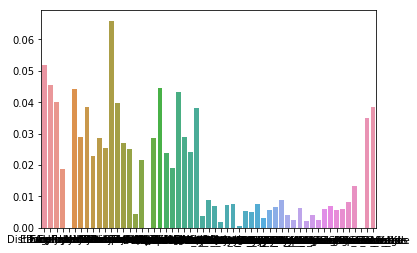

In [44]:
bplot=sns.barplot(y=rfc.feature_importances_, x=test_x.columns)
bplot.set_xticklabels(rotation=90)
bplot.show()